In [1]:
import os

# Get the current working directory
notebook_dir = os.getcwd()
print("Notebook is saved in:", notebook_dir)

Notebook is saved in: C:\Users\KAREEM


In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Load data


In [2]:
dataset =  pd.read_csv('100_Batches_IndPenSim_V3.csv')


In [4]:
dataset

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.1180,9.8335,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.2210,18.1550,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.3020,9.5982,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.8160,4.3395,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.9080,1.1045,0.00010,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113930,229.2,65,100,80,0.0000,12.9000,33.5860,5.93590,250,0.9,...,816050.0,823390.0,830160.0,835530.0,839140.0,840570.0,840160.0,838580.0,NaN,NaN
113931,229.4,65,100,80,0.0000,10.0470,10.0760,98.83400,250,0.9,...,773520.0,780840.0,787470.0,792750.0,796220.0,797610.0,797270.0,796020.0,NaN,NaN
113932,229.6,65,100,80,0.0000,7.3609,69.3450,9.88340,250,0.9,...,788240.0,795550.0,802190.0,807420.0,810590.0,811660.0,811210.0,809960.0,NaN,NaN
113933,229.8,65,100,80,0.0000,6.2794,38.6100,0.98834,250,0.9,...,781180.0,788420.0,794950.0,800140.0,803610.0,804900.0,804490.0,803410.0,NaN,NaN


In [6]:
#shape of the dataset
dataset.shape

(113935, 2239)

In [9]:
#utilising data in 33 columns for EDA
df = dataset.iloc[:, :33]

In [11]:
#info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Data columns (total 33 columns):
 #   Column                                                              Non-Null Count   Dtype  
---  ------                                                              --------------   -----  
 0   Time (h)                                                            113935 non-null  float64
 1   Aeration rate(Fg:L/h)                                               113935 non-null  int64  
 2   Agitator RPM(RPM:RPM)                                               113935 non-null  int64  
 3   Sugar feed rate(Fs:L/h)                                             113935 non-null  int64  
 4   Acid flow rate(Fa:L/h)                                              113935 non-null  float64
 5   Base flow rate(Fb:L/h)                                              113935 non-null  float64
 6   Heating/cooling water flow rate(Fc:L/h)                             113935 non-null  float64
 7   He

# Identifying the Batch with Maximun Pencillin Concentarion

In [13]:
Identification of Batch Start and Batch End points

Comparison of Batch End Results

Finding the batch with Best Penicillin Concentration

In [16]:
for i in df.columns:
    print(i, ":", df[i].nunique())
    print('-'*80)

Time (h) : 1450
--------------------------------------------------------------------------------
Aeration rate(Fg:L/h) : 7
--------------------------------------------------------------------------------
Agitator RPM(RPM:RPM) : 1
--------------------------------------------------------------------------------
Sugar feed rate(Fs:L/h) : 25
--------------------------------------------------------------------------------
Acid flow rate(Fa:L/h) : 1353
--------------------------------------------------------------------------------
Base flow rate(Fb:L/h) : 67206
--------------------------------------------------------------------------------
Heating/cooling water flow rate(Fc:L/h) : 77380
--------------------------------------------------------------------------------
Heating water flow rate(Fh:L/h) : 54534
--------------------------------------------------------------------------------
Water for injection/dilution(Fw:L/h) : 6
-----------------------------------------------------------------

In [23]:
# Find the indices of the batch start indices i.e., 0.2 time interval
batch_start_indices = df['Time (h)'].index[df['Time (h)'] == 0.2]

# Print the indices of the batch_start_indices
batch_start_indices

Int64Index([     0,   1130,   2280,   3670,   4820,   5715,   6865,   8025,
              9175,  10435,  11585,  12595,  13745,  14825,  15975,  16880,
             18030,  18970,  20120,  21155,  22305,  23445,  24595,  25915,
             27065,  28370,  29520,  30575,  31725,  33175,  34325,  35575,
             36725,  38025,  39175,  40155,  41305,  42355,  43505,  44680,
             45830,  47045,  48195,  49350,  50500,  51810,  52960,  54100,
             55250,  56410,  57560,  58685,  59835,  60800,  61950,  63070,
             64220,  65390,  66540,  67560,  68710,  69915,  71065,  72215,
             73365,  74520,  75670,  76505,  77655,  78780,  79930,  81000,
             82150,  83330,  84480,  85440,  86590,  87615,  88765,  89940,
             91090,  92190,  93340,  94545,  95695,  96695,  97845,  98955,
            100105, 101260, 102410, 103700, 104850, 105900, 107050, 108105,
            109255, 110380, 111530, 112785],
           dtype='int64')

In [25]:
def find_batch_end_indices(df):
    """Finds the indices of the rows in the DataFrame where the `Time (h)` column is equal to 0.2 time interval.

  Args:
    df: A Pandas DataFrame.

  Returns:
    A Pandas Series containing the indices of the rows in the DataFrame where the `Time (h)` column is equal to 0.2.
  """
    # Find the indices where 'Time (h)' is equal to 0.2
    indices_0_2 = df[df['Time (h)'] == 0.2].index
    
    # Calculate the indices immediately before 0.2
    indices_before_0_2 = indices_0_2 - 1
    
    # Filter out negative indices (those before the start of the DataFrame)
    indices_before_0_2_filtered = indices_before_0_2[indices_before_0_2 > 0]
    
    # Create a mask for filtered indices greater than 0
    indices_before_0_2_filtered_mask = indices_before_0_2_filtered > 0
    
    # Return the filtered indices, which represent the batch end indices
    return indices_before_0_2_filtered[indices_before_0_2_filtered_mask]

# Call the function and copy the DataFrame
batch_end_indices = find_batch_end_indices(df.copy())

# Append the last index to represent the end of the final batch
batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))

# Print the indices of the batch_end_indices
print(batch_end_indices)

Int64Index([  1129,   2279,   3669,   4819,   5714,   6864,   8024,   9174,
             10434,  11584,  12594,  13744,  14824,  15974,  16879,  18029,
             18969,  20119,  21154,  22304,  23444,  24594,  25914,  27064,
             28369,  29519,  30574,  31724,  33174,  34324,  35574,  36724,
             38024,  39174,  40154,  41304,  42354,  43504,  44679,  45829,
             47044,  48194,  49349,  50499,  51809,  52959,  54099,  55249,
             56409,  57559,  58684,  59834,  60799,  61949,  63069,  64219,
             65389,  66539,  67559,  68709,  69914,  71064,  72214,  73364,
             74519,  75669,  76504,  77654,  78779,  79929,  80999,  82149,
             83329,  84479,  85439,  86589,  87614,  88764,  89939,  91089,
             92189,  93339,  94544,  95694,  96694,  97844,  98954, 100104,
            101259, 102409, 103699, 104849, 105899, 107049, 108104, 109254,
            110379, 111529, 112784, 113934],
           dtype='int64')


In [27]:
#results of batches will be in the end indices 
results_df = df.iloc[batch_end_indices]
results_df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
1129,226.0,65,100,80,0.000,200.3000,42.8750,1.2727,250,0.9,...,2023.4,1.27630,0.19061,29.3860,23.860,1.46690,0,74.573,0,0
2279,230.0,65,100,80,0.000,44.1360,1.8578,0.0001,250,0.9,...,2073.2,1.03340,0.19321,30.3920,20.873,1.25930,0,61.530,0,0
3669,278.0,60,100,80,0.000,24.4660,63.6390,444.2800,100,0.9,...,3476.8,0.55138,0.19809,17.5030,18.012,0.73368,0,75.530,0,0
4819,230.0,65,100,80,0.000,15.7810,75.7280,1.6785,250,0.9,...,3350.1,0.26071,0.20055,15.1890,17.502,0.97370,0,59.638,0,0
5714,179.0,75,100,80,0.000,63.6400,111.6700,14.9050,150,0.9,...,1818.6,1.37300,0.19166,28.0380,24.669,1.54670,0,77.112,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109254,230.0,65,100,80,0.000,14.7720,73.4010,10.5370,250,0.9,...,2950.6,0.54856,0.19773,21.2200,20.482,1.11860,0,67.908,0,0
110379,225.0,65,100,80,0.000,6.5491,57.7560,1.1040,250,0.9,...,3176.7,0.69632,0.19636,17.0520,20.729,1.15890,0,72.165,0,0
111529,230.0,65,100,80,0.000,60.4400,70.9450,11.0470,250,0.9,...,1962.0,0.89484,0.19443,32.8080,21.664,1.24770,0,66.590,0,0
112784,251.0,60,100,80,1.037,0.0000,281.7100,6.7026,0,0.9,...,4028.5,0.30526,0.20057,5.4819,13.774,0.66308,0,90.729,0,0


In [50]:
#descriptive statistics of batch end data of all batches
results_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),100.0,227.870000,1.815069e+01,167.000000,227.500000,230.000000,230.000000,290.00000
Aeration rate(Fg:L/h),100.0,65.350000,3.198406e+00,60.000000,65.000000,65.000000,65.000000,75.00000
Agitator RPM(RPM:RPM),100.0,100.000000,0.000000e+00,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),100.0,81.800000,1.957271e+01,20.000000,80.000000,80.000000,80.000000,150.00000
Acid flow rate(Fa:L/h),100.0,0.155721,6.618278e-01,0.000000,0.000000,0.000000,0.000000,4.15080
Base flow rate(Fb:L/h),100.0,37.788269,3.775116e+01,0.000000,9.951425,29.927000,54.146750,200.30000
Heating/cooling water flow rate(Fc:L/h),100.0,47.035829,4.475456e+01,0.000100,14.768500,32.771500,68.589250,281.71000
Heating water flow rate(Fh:L/h),100.0,42.467140,6.897390e+01,0.000100,1.612250,9.296450,67.956750,444.28000
Water for injection/dilution(Fw:L/h),100.0,224.000000,7.159087e+01,0.000000,250.000000,250.000000,250.000000,400.00000
Air head pressure(pressure:bar),100.0,0.900000,7.810713e-16,0.900000,0.900000,0.900000,0.900000,0.90000


In [34]:
# Create an empty list to store batch-wise indices
batch_indices = []

# Initialize variables to track the start and end of a batch
batch_start = batch_start_indices[0]
for batch_end in batch_end_indices:
    # Append the indices for the current batch to the list
    batch_indices.append((batch_start, batch_end))
    # Update the start of the next batch
    batch_start = batch_end + 1

# Find the batch where 'Offline Penicillin concentration (P_offline:P(g L^{-1}))' is 36.18 maximum
target_concentration = 36.18
target_batch = None

for i, (start, end) in enumerate(batch_indices):
    batch_data = df[start:end+1]
    if target_concentration in batch_data['Offline Penicillin concentration(P_offline:P(g L^{-1}))'].values:
        target_batch = i + 1  # Batch numbers start from 1

print(f'Batch with Offline Penicillin concentration {target_concentration} is Batch {target_batch}')


Batch with Offline Penicillin concentration 36.18 is Batch 29


In [36]:
# Find the start and end indices of Batch 29
batch_number = 29

if 1 <= batch_number <= len(batch_indices):
    batch_29_start, batch_29_end = batch_indices[batch_number - 1]
    print(f"Start Index of Batch 29: {batch_29_start}")
    print(f"End Index of Batch 29: {batch_29_end}")
else:
    print("Batch 29 is out of range.")

Start Index of Batch 29: 31725
End Index of Batch 29: 33174


In [41]:
batch_29_df = df.loc[31725:33174]
batch_29_df

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1})),Oxygen Uptake Rate(OUR:(g min^{-1})),Oxygen in percent in off-gas(O2:O2 (%)),Offline Penicillin concentration(P_offline:P(g L^{-1})),Offline Biomass concentratio(X_offline:X(g L^{-1})),Carbon evolution rate(CER:g/h),Ammonia shots(NH3_shots:kgs),Viscosity(Viscosity_offline:centPoise),Fault reference(Fault_ref:Fault ref),0 - Recipe driven 1 - Operator controlled(Control_ref:Control ref)
31725,0.2,30,100,8,0.00000,29.501,0.0001,224.11000,0,0.6,...,NaN,1.027400,0.18538,NaN,NaN,0.035263,0,NaN,0,0
31726,0.4,30,100,8,0.00000,50.489,0.0001,64.56800,0,0.6,...,NaN,0.210780,0.20103,NaN,NaN,0.039935,0,NaN,0,0
31727,0.6,30,100,8,0.00000,55.430,0.0001,0.00010,0,0.6,...,NaN,0.016882,0.20465,NaN,NaN,0.041510,0,NaN,0,0
31728,0.8,30,100,8,0.00000,41.187,0.0001,82.77800,0,0.6,...,NaN,-0.017887,0.20529,NaN,NaN,0.042484,0,NaN,0,0
31729,1.0,30,100,8,0.51791,20.593,92.8010,8.27780,0,0.6,...,1720.2,-0.016022,0.20525,0.001,0.56066,0.043367,0,4.0847,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33170,289.2,60,100,80,0.00000,45.155,51.1560,6.19280,100,0.9,...,NaN,1.394300,0.18925,NaN,NaN,1.081200,0,NaN,0,0
33171,289.4,60,100,80,0.00000,43.360,15.3470,121.06000,100,0.9,...,NaN,1.409300,0.18911,NaN,NaN,1.081900,0,NaN,0,0
33172,289.6,60,100,80,0.00000,43.013,111.3600,12.10600,100,0.9,...,NaN,1.414000,0.18906,NaN,NaN,1.082700,0,NaN,0,0
33173,289.8,60,100,80,0.00000,44.094,67.5700,1.21060,100,0.9,...,NaN,1.408400,0.18911,NaN,NaN,1.083500,0,NaN,0,0


# Analysing the batch with highest penicillin concentration

In [42]:
batch_29_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time (h),1450.0,145.100000,83.744652,0.200000,72.650000,145.100000,217.550000,290.00000
Aeration rate(Fg:L/h),1450.0,64.634483,10.402403,30.000000,60.000000,65.000000,75.000000,75.00000
Agitator RPM(RPM:RPM),1450.0,100.000000,0.000000,100.000000,100.000000,100.000000,100.000000,100.00000
Sugar feed rate(Fs:L/h),1450.0,77.293103,21.193844,8.000000,80.000000,80.000000,90.000000,150.00000
Acid flow rate(Fa:L/h),1450.0,0.008239,0.099012,0.000000,0.000000,0.000000,0.000000,2.07920
Base flow rate(Fb:L/h),1450.0,47.760901,24.470514,0.000000,37.301250,45.509000,55.909250,225.00000
Heating/cooling water flow rate(Fc:L/h),1450.0,86.049191,119.428583,0.000100,15.314750,37.425500,96.648500,674.12000
Heating water flow rate(Fh:L/h),1450.0,21.358063,45.536185,0.000100,0.000100,0.995770,12.808750,461.82000
Water for injection/dilution(Fw:L/h),1450.0,148.275862,146.551549,0.000000,0.000000,100.000000,250.000000,500.00000
Air head pressure(pressure:bar),1450.0,0.935379,0.120486,0.600000,0.900000,0.900000,1.000000,1.10000


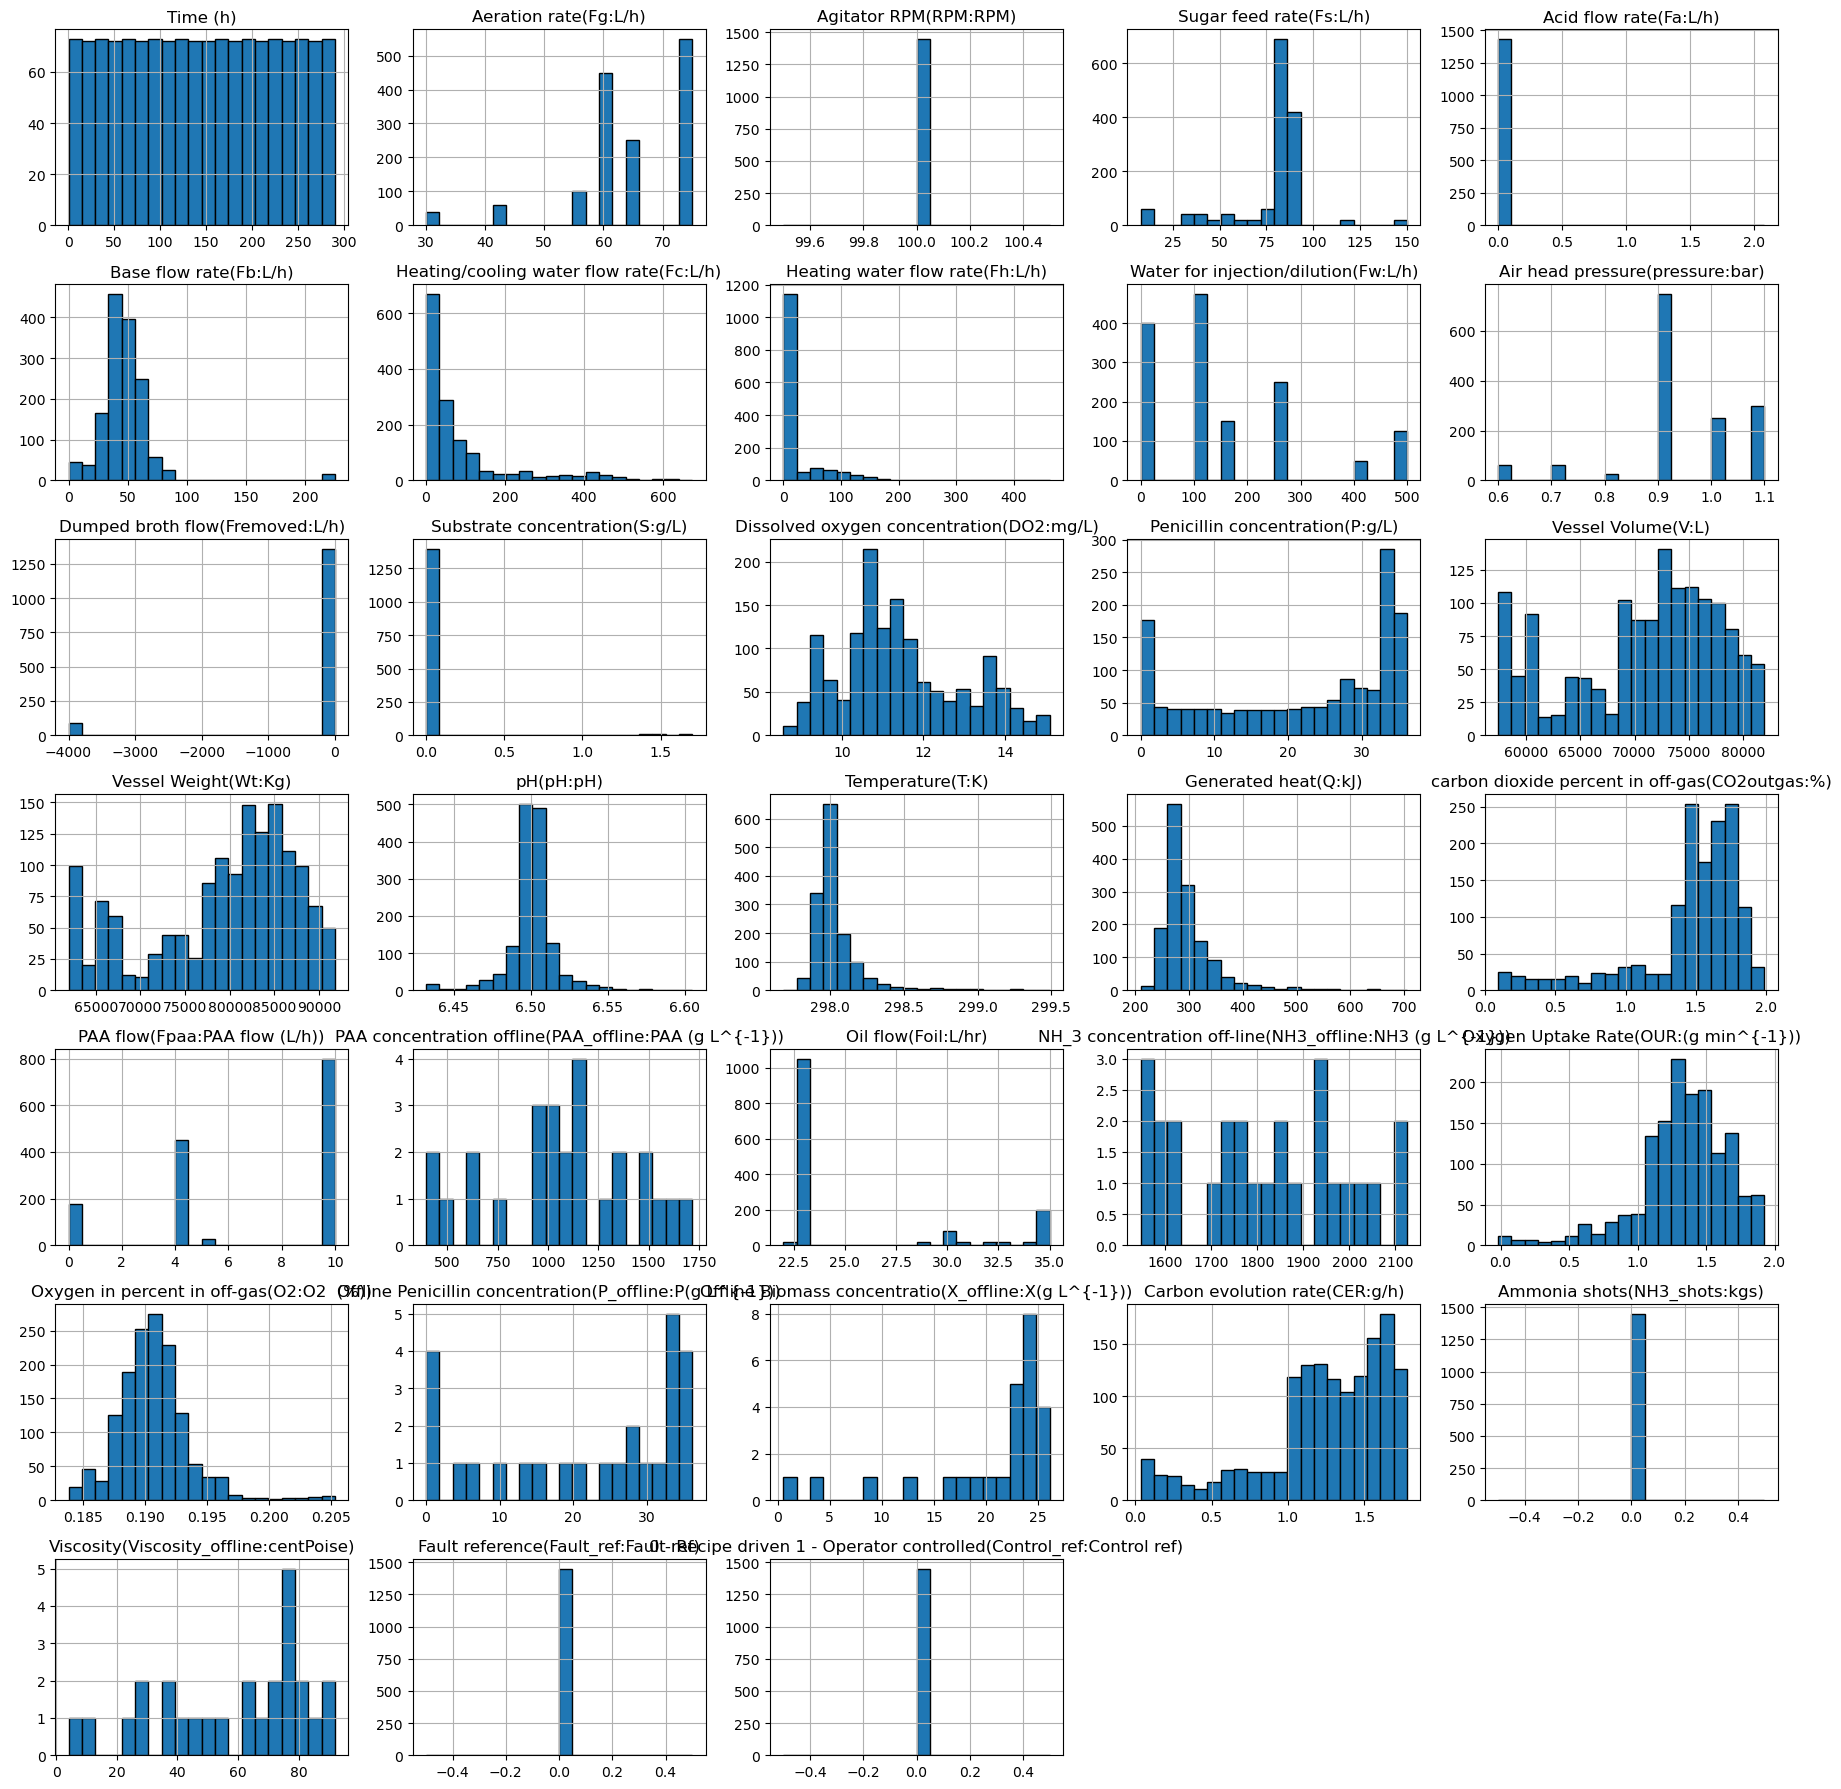

In [45]:
# Create a 6x6 grid of subplots
fig, axes = plt.subplots(7, 5, figsize=(18, 18))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Flatten the axes array for easy iteration
axes = axes.ravel()

# Plot histograms for each variable in batch_29_df
for i, var in enumerate(batch_29_df.columns):
    ax = axes[i]
    ax.hist(batch_29_df[var], bins=20, edgecolor='k')
    ax.set_title(var)
    ax.grid(True)

# Remove empty subplots
for i in range(len(batch_29_df.columns), 35):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Observation on Penicillin Concentration

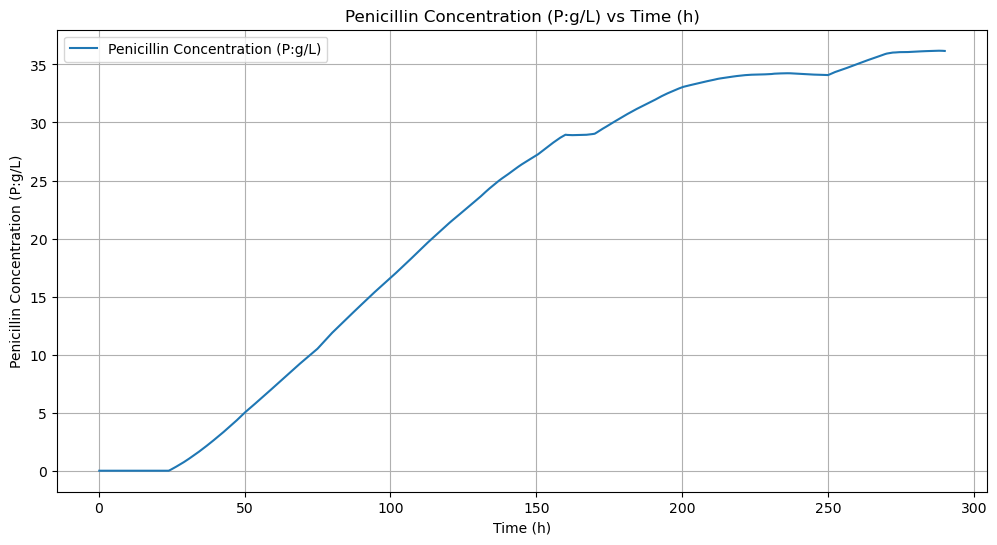

In [51]:
# Plot the Penicillin Concentration (P:g/L) for Batch 29
plt.figure(figsize=(12, 6))
plt.plot(batch_29_df['Time (h)'], batch_29_df['Penicillin concentration(P:g/L)'], label='Penicillin Concentration (P:g/L)')
plt.xlabel('Time (h)')
plt.ylabel('Penicillin Concentration (P:g/L)')
plt.title('Penicillin Concentration (P:g/L) vs Time (h)')
plt.legend()
plt.grid(True)
plt.show()